In [3]:
import re
import json
import matplotlib.pyplot as plt



In [4]:
# Function to parse predictions from meme_predictions.txt
def parse_meme_predictions(file_path):
    predictions = []
    with open(file_path, 'r') as file:
        for line in file:
            match = re.search(r'Image: (.+), Predicted Label: (.+)', line)
            if match:
                image_id = match.group(1).split('/')[-1].split('.')[0]  # Extract image ID from the file path
                predicted_label = match.group(2)
                predictions.append((image_id, predicted_label))
    return predictions

# Function to parse predictions from text_predictions.txt
def parse_text_predictions(file_path):
    predictions = []
    with open(file_path, 'r') as file:
        for line in file:
            match = re.search(r'Text: (.+) \| Image ID: (\d+) \| Prediction: (.+)', line)
            if match:
                text = match.group(1)
                image_id = match.group(2)
                predicted_label = match.group(3)
                predictions.append((image_id, predicted_label))
    return predictions

# Function to parse true labels from test_seen.jsonl
def parse_true_labels(file_path):
    true_labels = {}
    with open(file_path, 'r') as file:
        for line in file:
            data = json.loads(line)
            image_id = data['id']
            label = data['label']
            true_labels[image_id] = label
    return true_labels

# Function to save image IDs into a text file
def save_image_ids(image_ids, file_path):
    with open(file_path, 'w') as file:
        for image_id in image_ids:
            file.write(image_id + '\n')


In [5]:

# Parse predictions from meme_predictions.txt and text_predictions.txt
meme_predictions = parse_meme_predictions('meme_predictions.txt')
text_predictions = parse_text_predictions('text_predictions.txt')

# Parse true labels from test_seen.jsonl
true_labels = parse_true_labels('test_seen.jsonl')

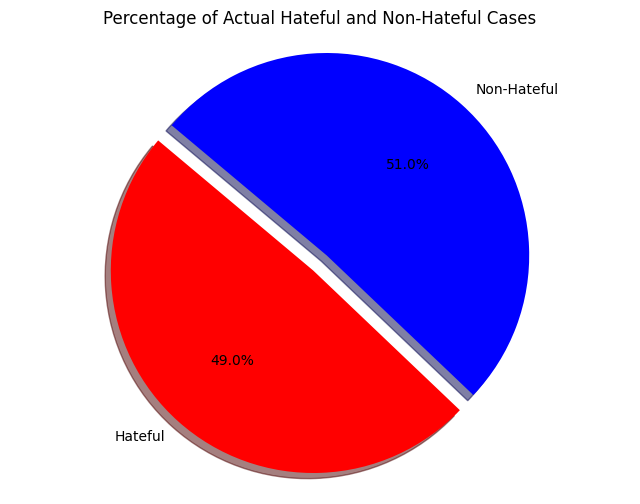

In [6]:
import matplotlib.pyplot as plt

# Calculate the total number of predictions
total_predictions = len(true_labels)

# Count the number of hateful and non-hateful cases
hateful_count = sum(1 for label in true_labels.values() if label == 1)
non_hateful_count = sum(1 for label in true_labels.values() if label == 0)

# Calculate the percentage of hateful and non-hateful cases
hateful_percentage = (hateful_count / total_predictions) * 100
non_hateful_percentage = (non_hateful_count / total_predictions) * 100

# Plotting the pie chart
labels = ['Hateful', 'Non-Hateful']
sizes = [hateful_percentage, non_hateful_percentage]
colors = ['red', 'blue']
explode = (0.1, 0)  # explode the 1st slice (Hateful)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Actual Hateful and Non-Hateful Cases')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

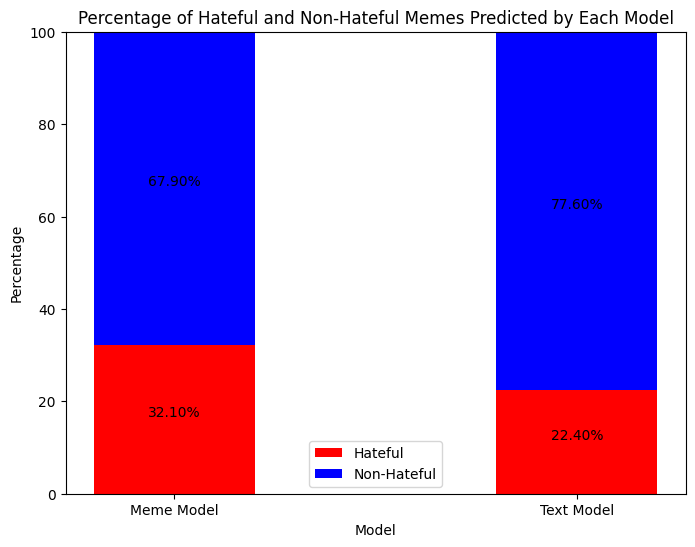

In [7]:
def plot_percentage_hateful_non_hateful(meme_predictions, text_predictions, true_labels):
    # Count the total number of memes
    total_meme_count = len(meme_predictions)
    total_text_count = len(text_predictions)

    # Count the number of hateful and non-hateful memes predicted by each model
    meme_hateful_count = sum(1 for _, label in meme_predictions if label == 'Hateful')
    meme_non_hateful_count = total_meme_count - meme_hateful_count

    text_hateful_count = sum(1 for _, label in text_predictions if label == 'Hateful')
    text_non_hateful_count = total_text_count - text_hateful_count

    # Calculate percentages
    meme_hateful_percentage = meme_hateful_count / total_meme_count * 100
    meme_non_hateful_percentage = meme_non_hateful_count / total_meme_count * 100

    text_hateful_percentage = text_hateful_count / total_text_count * 100
    text_non_hateful_percentage = text_non_hateful_count / total_text_count * 100

    # Plotting
    labels = ['Meme Model', 'Text Model']
    hateful_percentages = [meme_hateful_percentage, text_hateful_percentage]
    non_hateful_percentages = [meme_non_hateful_percentage, text_non_hateful_percentage]

    x = range(len(labels))

    plt.figure(figsize=(8, 6))
    plt.bar(x, hateful_percentages, color='red', width=0.4, label='Hateful')
    plt.bar(x, non_hateful_percentages, color='blue', width=0.4, label='Non-Hateful', bottom=hateful_percentages)

    plt.xlabel('Model')
    plt.ylabel('Percentage')
    plt.title('Percentage of Hateful and Non-Hateful Memes Predicted by Each Model')
    plt.xticks(x, labels)
    plt.legend()
    plt.ylim(0, 100)

    # Add annotations to the bars
    for i, (hateful_percentage, non_hateful_percentage) in enumerate(zip(hateful_percentages, non_hateful_percentages)):
        plt.text(i, hateful_percentage / 2, f'{hateful_percentage:.2f}%', ha='center', va='bottom')
        plt.text(i, hateful_percentage + non_hateful_percentage / 2, f'{non_hateful_percentage:.2f}%', ha='center', va='bottom')

    plt.show()

plot_percentage_hateful_non_hateful(meme_predictions, text_predictions, true_labels)

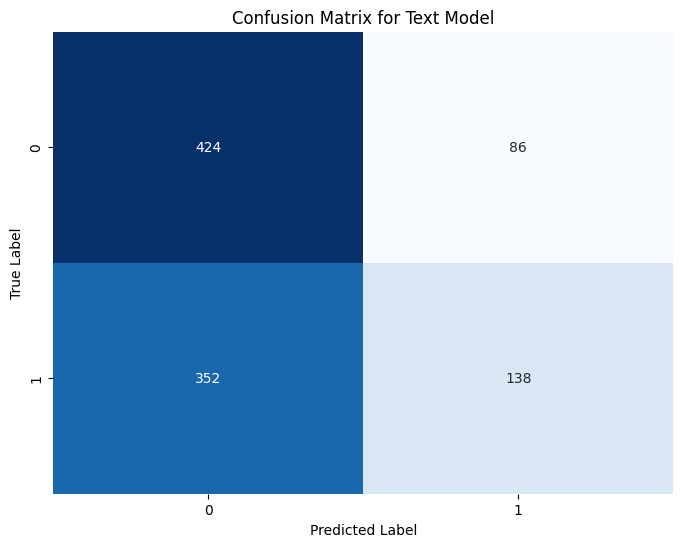

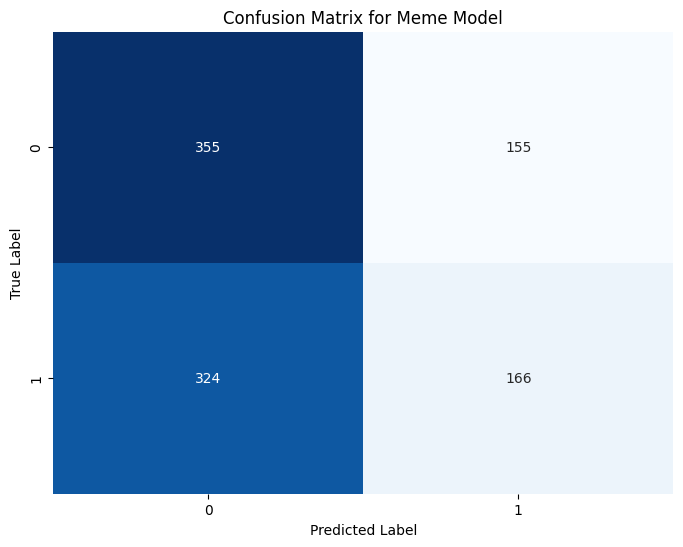

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(true_labels, predicted_labels, model_name):
    # Calculate confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    
    # Plot confusion matrix using seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Calculate true labels and predicted labels for each model
true_labels_text = [true_labels.get(image_id) for image_id, label in text_predictions]
predicted_labels_text = [1 if label == 'Hateful' else 0 for image_id, label in text_predictions]

true_labels_meme = [true_labels.get(image_id) for image_id, label in meme_predictions]
predicted_labels_meme = [1 if label == 'Hateful' else 0 for image_id, label in meme_predictions]

# Plot confusion matrix for the text model
plot_confusion_matrix(true_labels_text, predicted_labels_text, 'Text Model')

# Plot confusion matrix for the image model
plot_confusion_matrix(true_labels_meme, predicted_labels_meme, 'Meme Model')


In [9]:
# Function to plot percentage of correct predictions for each label type (Hateful and Non-Hateful)
def plot_correct_percentage(predictions, true_labels, model_name):
    hateful_correct = 0
    non_hateful_correct = 0
    total_hateful = 0
    total_non_hateful = 0
    
    for pred in predictions:
        image_id, label = pred
        true_label = true_labels.get(image_id)
        if true_label is not None:
            if true_label == 1:  # Hateful
                total_hateful += 1
                if label == 'Hateful':
                    hateful_correct += 1
            elif true_label == 0:  # Non-Hateful
                total_non_hateful += 1
                if label == 'Non-Hateful':
                    non_hateful_correct += 1

    # Calculate percentages
    hateful_percentage = hateful_correct / total_hateful * 100 if total_hateful != 0 else 0
    non_hateful_percentage = non_hateful_correct / total_non_hateful * 100 if total_non_hateful != 0 else 0

    # Plotting
    labels = ['Hateful', 'Non-Hateful']
    percentages = [hateful_percentage, non_hateful_percentage]

    plt.figure(figsize=(6, 4))
    bars = plt.bar(labels, percentages, color=['red', 'blue'])
    plt.title(f'Percentage of Correct Predictions by {model_name}')
    plt.xlabel('Meme Type')
    plt.ylabel('Percentage')
    plt.ylim(0, 100)

    # Add annotations to the bars
    for bar, percentage in zip(bars, percentages):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

    plt.show()

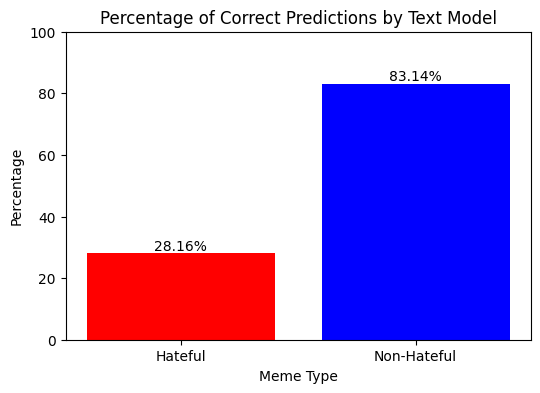

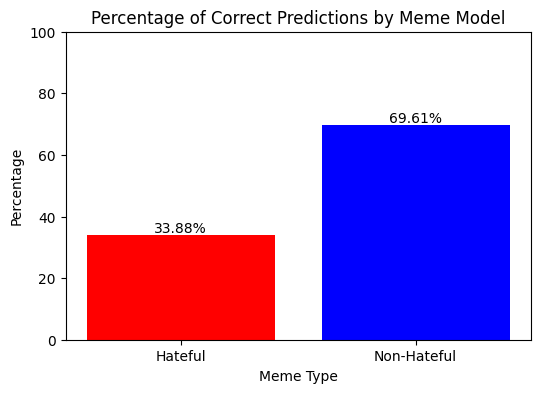

In [10]:
# Plot percentage of correct predictions for each label type (Hateful and Non-Hateful) for the text model
plot_correct_percentage(text_predictions, true_labels, 'Text Model')

# Plot percentage of correct predictions for each label type (Hateful and Non-Hateful) for the meme model
plot_correct_percentage(meme_predictions, true_labels, 'Meme Model')

In [11]:
# Function to calculate values for each quadrant in the confusion matrix
def calculate_confusion_matrix_values(true_labels, predicted_labels):
    true_hateful = true_non_hateful = false_hateful = false_non_hateful = 0
    
    for true_label, predicted_label in zip(true_labels, predicted_labels):
        if true_label== 1:
            if predicted_label == 1:
                true_hateful += 1 
            else:
                false_non_hateful += 1
        else:  # True label is Non-Hateful
            if predicted_label ==0:
                true_non_hateful += 1
            else:
                false_hateful += 1
                
    return true_hateful, true_non_hateful, false_hateful, false_non_hateful

# Calculate values for each quadrant in the confusion matrix for the text model
text_true_hateful, text_true_non_hateful, text_false_hateful, text_false_non_hateful = calculate_confusion_matrix_values(true_labels_text, predicted_labels_text)

# Calculate values for each quadrant in the confusion matrix for the image model
meme_true_hateful, meme_true_non_hateful, meme_false_hateful, meme_false_non_hateful = calculate_confusion_matrix_values(true_labels_meme, predicted_labels_meme)

# # Print the values for each quadrant for both models
# print("Text Model Confusion Matrix:")
# print("True Hateful:", text_true_hateful)
# print("True Non-Hateful:", text_true_non_hateful)
# print("False Hateful:", text_false_hateful)
# print("False Non-Hateful:", text_false_non_hateful)

# print("\nImage Model Confusion Matrix:")
# print("True Hateful:", image_true_hateful)
# print("True Non-Hateful:", image_true_non_hateful)
# print("False Hateful:", image_false_hateful)
# print("False Non-Hateful:", image_false_non_hateful)

In [12]:


# Calculate accuracy for the text model
text_total = len(text_predictions)
text_correct = sum(1 for text_pred in text_predictions if true_labels.get(text_pred[0]) == int(text_pred[1] == 'Hateful'))
text_accuracy = text_correct / text_total * 100

# Calculate accuracy for the image model
meme_total = len(meme_predictions)
meme_correct = sum(1 for meme_pred in meme_predictions if true_labels.get(meme_pred[0]) == int(meme_pred[1] == 'Hateful'))
meme_accuracy = meme_correct / meme_total * 100


In [13]:
# Calculate precision, recall, and F1 score for the text model
text_precision = text_true_hateful/(text_true_hateful + text_false_hateful)
text_recall = text_true_hateful/(text_true_hateful + text_false_non_hateful)
text_f1 = 2 * (text_precision * text_recall) / (text_precision + text_recall)

# Calculate precision, recall, and F1 score for the image model
meme_precision = meme_true_hateful / (meme_true_hateful + meme_false_hateful)
meme_recall = meme_true_hateful / (meme_true_hateful + meme_false_non_hateful)
meme_f1 = 2 * (meme_precision * meme_recall) / (meme_precision + meme_recall)



In [14]:
print(f"Text Model Accuracy: {text_accuracy:.2f}%")
print(f"Text Model Precision: {text_precision:.2f}")
print(f"Text Model Recall: {text_recall:.2f}")
print(f"Text Model F1 Score: {text_f1:.2f}")

Text Model Accuracy: 56.20%
Text Model Precision: 0.62
Text Model Recall: 0.28
Text Model F1 Score: 0.39


In [15]:
print(f"Meme Model Accuracy: {meme_accuracy:.2f}%")
print(f"Meme Model Precision: {meme_precision:.2f}")
print(f"Meme Model Recall: {meme_recall:.2f}")
print(f"Meme Model F1 Score: {meme_f1:.2f}")


Meme Model Accuracy: 52.10%
Meme Model Precision: 0.52
Meme Model Recall: 0.34
Meme Model F1 Score: 0.41


In [103]:
# Define scenario labels
scenarios = ['Both Hateful', 'Both Non-Hateful', 'Meme Hateful, Text Non-Hateful', 'Meme Non-Hateful, Text Hateful']
scenario_counts = [0] * len(scenarios)
# Compare predictions and categorize cases
for meme_pred, text_pred in zip(meme_predictions, text_predictions):
    image_id_meme, label_meme = meme_pred
    image_id_text, label_text = text_pred
    if label_meme == 'Hateful' and label_text == 'Hateful':
        scenario_counts[0] += 1  # Both Hateful
    elif label_meme == 'Non-Hateful' and label_text == 'Non-Hateful':
        scenario_counts[1] += 1  # Both Non-Hateful
    elif label_meme == 'Hateful' and label_text == 'Non-Hateful':
        scenario_counts[2] += 1  # Meme Hateful, Text Non-Hateful
    elif label_meme == 'Non-Hateful' and label_text == 'Hateful':
        scenario_counts[3] += 1  #Meme Non-Hateful, Text Hateful

# Calculate the total number of predictions
total_predictions = len(meme_predictions)

# Calculate the percentage for each scenario
scenario_percentages = [count / total_predictions * 100 for count in scenario_counts]

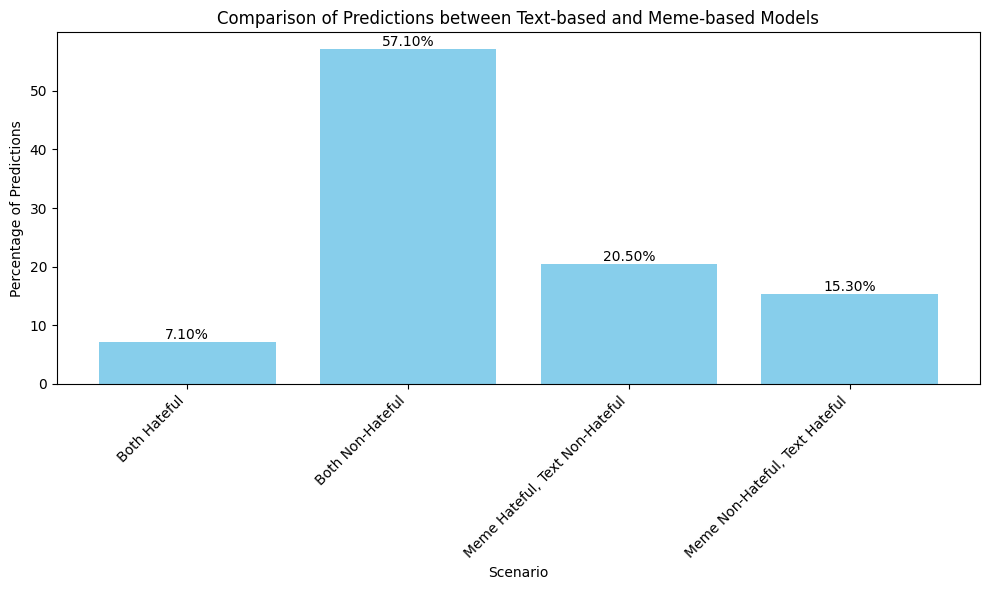

In [104]:
# Plot the comparison results with percentages and annotations
plt.figure(figsize=(10, 6))
bars = plt.bar(scenarios, scenario_percentages, color='skyblue')
plt.xlabel('Scenario')
plt.ylabel('Percentage of Predictions')
plt.title('Comparison of Predictions between Text-based and Meme-based Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Add annotations to the bars
for bar, percentage in zip(bars, scenario_percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

In [105]:
meme_hateful_text_hateful_both_correct =0

for meme_pred, text_pred in zip(meme_predictions, text_predictions):
    image_id_meme, label_meme = meme_pred
    image_id_text, label_text = text_pred
     
    true_label = true_labels.get(image_id_meme)
    if true_label is not None:
        if label_meme == 'Hateful' and label_text == 'Hateful' and true_label == 1:
            meme_hateful_text_hateful_both_correct += 1


total_meme_hateful_text_hateful=scenario_counts[0]
meme_hateful_text_hateful_both_correct_percentage = meme_hateful_text_hateful_both_correct / total_meme_hateful_text_hateful * 100
print(f"Percentage of cases where both meme and text predict hateful and their prediction is right: {meme_hateful_text_hateful_both_correct_percentage:.2f}%")

Percentage of cases where both meme and text predict hateful and their prediction is right: 67.61%


In [106]:
meme_non_hateful_text_non_hateful_both_correct =0

for meme_pred, text_pred in zip(meme_predictions, text_predictions):
    image_id_meme, label_meme = meme_pred
    image_id_text, label_text = text_pred
     
    true_label = true_labels.get(image_id_meme)
    if true_label is not None:
        if label_meme == 'Non-Hateful' and label_text == 'Non-Hateful' and true_label == 0:
            meme_non_hateful_text_non_hateful_both_correct += 1


total_meme_non_hateful_text_non_hateful=scenario_counts[1]
meme_non_hateful_text_non_hateful_both_correct_percentage = meme_non_hateful_text_non_hateful_both_correct / total_meme_non_hateful_text_non_hateful * 100
print(f"Percentage of cases where both meme and text predict non-hateful and their prediction is right: {meme_non_hateful_text_non_hateful_both_correct_percentage :.2f}%")

Percentage of cases where both meme and text predict non-hateful and their prediction is right: 53.77%


In [107]:
both_same_correct=0
for meme_pred, text_pred in zip(meme_predictions, text_predictions):
    image_id_meme, label_meme = meme_pred
    image_id_text, label_text = text_pred

    true_label = true_labels.get(image_id_meme)
    if true_label is not None:
        if (label_meme == 'Hateful' and label_text == 'Hateful' and true_label == 1) or (label_meme == 'Non-Hateful' and label_text == 'Non-Hateful' and true_label == 0):
            both_same_correct+=1

total_both_same=scenario_counts[0]+scenario_counts[1]
both_same_correct_percentage =  both_same_correct/total_both_same * 100
print(f"Percentage of cases where both meme and text predict same and their prediction is right: {both_same_correct_percentage:.2f}%")

Percentage of cases where both meme and text predict same and their prediction is right: 55.30%


In [108]:
# Initialize counter for cases where meme predicts hateful and text predicts non-hateful and meme is correct
meme_hateful_text_non_hateful_meme_correct = 0

# Iterate through both sets of predictions and compare with true labels
for meme_pred, text_pred in zip(meme_predictions, text_predictions):
    image_id_meme, label_meme = meme_pred
    image_id_text, label_text = text_pred
    
    true_label = true_labels.get(image_id_meme)
    if true_label is not None:
        # Check if text predicts hateful and meme predicts non-hateful
        if label_meme == 'Hateful' and label_text == 'Non-Hateful' and true_label == 1:
            meme_hateful_text_non_hateful_meme_correct += 1

# Calculate the percentage of correct predictions by the text model
total_meme_hateful_text_non_hateful = scenario_counts[2]
meme_hateful_text_non_hateful_meme_correct_percentage = (meme_hateful_text_non_hateful_meme_correct / total_meme_hateful_text_non_hateful) * 100

print(f"Percentage of cases where meme predicts hateful and text predicts non-hateful, and meme prediction is right: {meme_hateful_text_non_hateful_meme_correct_percentage:.2f}%")
# Calculate the percentage of cases where the prediction made by the meme model is correct
meme_hateful_text_non_hateful_text_correct_percentage = 100 - meme_hateful_text_non_hateful_meme_correct_percentage

print(f"Percentage of cases where meme predicts hateful and text predicts non-hateful, and text prediction is right: {meme_hateful_text_non_hateful_text_correct_percentage:.2f}%")


Percentage of cases where meme predicts hateful and text predicts non-hateful, and meme prediction is right: 42.93%
Percentage of cases where meme predicts hateful and text predicts non-hateful, and text prediction is right: 57.07%


In [109]:
# Initialize counter for cases where meme predicts non-hateful and text predicts hateful and text is correct
meme_non_hateful_text_hateful_text_correct = 0

# Iterate through both sets of predictions and compare with true labels
for meme_pred, text_pred in zip(meme_predictions, text_predictions):
    image_id_meme, label_meme = meme_pred
    image_id_text, label_text = text_pred
    
    true_label = true_labels.get(image_id_meme)
    if true_label is not None:
        # Check if meme predicts hateful and text predicts non-hateful
        if label_meme == 'Non-Hateful' and label_text == 'Hateful' and true_label == 1:
             meme_non_hateful_text_hateful_text_correct += 1

# Calculate the percentage of correct predictions by the meme model
total_meme_non_hateful_text_hateful = scenario_counts[3]
meme_non_hateful_text_hateful_text_correct_percentage = (meme_non_hateful_text_hateful_text_correct/total_meme_non_hateful_text_hateful  ) * 100

print(f"Percentage of cases where meme predicts non-hateful and text predicts hateful, and text prediction is right: {meme_non_hateful_text_hateful_text_correct_percentage:.2f}%")
# Calculate the complementary percentage for cases where meme predicts hateful and text predicts non-hateful
meme_non_hateful_text_hateful_meme_correct_percentage = 100 - meme_non_hateful_text_hateful_text_correct_percentage

print(f"Percentage of cases where meme predicts non-hateful and text predicts hateful, and meme prediction is right: {meme_non_hateful_text_hateful_meme_correct_percentage:.2f}%")


Percentage of cases where meme predicts non-hateful and text predicts hateful, and text prediction is right: 58.82%
Percentage of cases where meme predicts non-hateful and text predicts hateful, and meme prediction is right: 41.18%


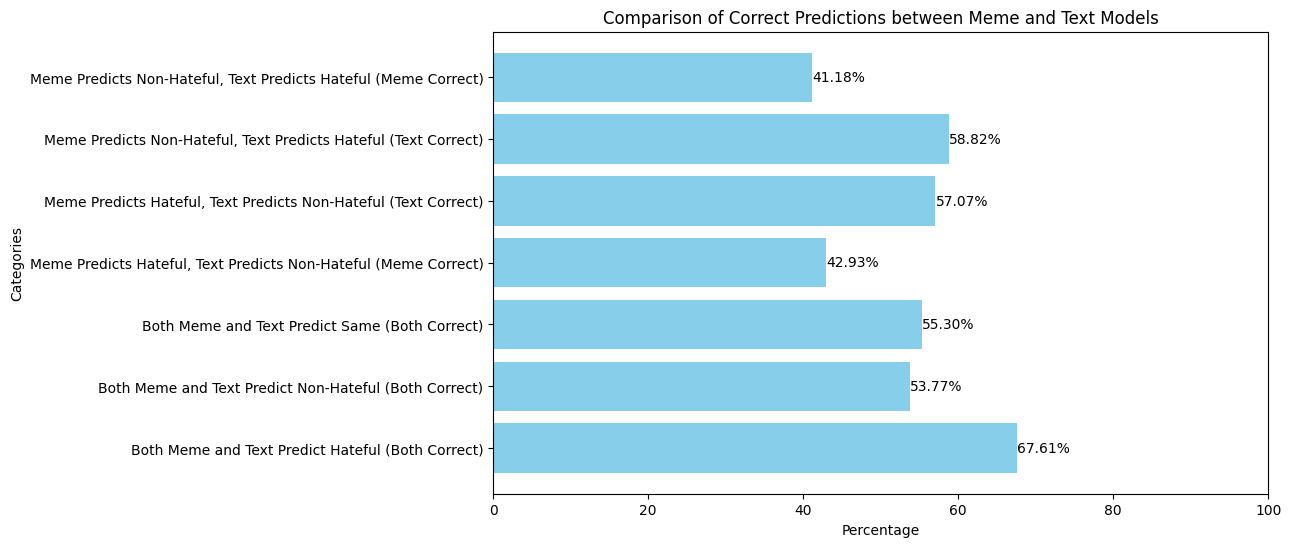

In [110]:
import matplotlib.pyplot as plt

# Define categories and their respective percentages
categories = [
    "Both Meme and Text Predict Hateful (Both Correct)",
    "Both Meme and Text Predict Non-Hateful (Both Correct)",
    "Both Meme and Text Predict Same (Both Correct)",
    "Meme Predicts Hateful, Text Predicts Non-Hateful (Meme Correct)",
    "Meme Predicts Hateful, Text Predicts Non-Hateful (Text Correct)",
    "Meme Predicts Non-Hateful, Text Predicts Hateful (Text Correct)",
    "Meme Predicts Non-Hateful, Text Predicts Hateful (Meme Correct)"
]
percentages = [
    meme_hateful_text_hateful_both_correct_percentage,
    meme_non_hateful_text_non_hateful_both_correct_percentage,
    both_same_correct_percentage,
    meme_hateful_text_non_hateful_meme_correct_percentage,
    meme_hateful_text_non_hateful_text_correct_percentage,
    meme_non_hateful_text_hateful_text_correct_percentage,
    meme_non_hateful_text_hateful_meme_correct_percentage
]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(categories, percentages, color='skyblue')
plt.xlabel('Percentage')
plt.ylabel('Categories')
plt.title('Comparison of Correct Predictions between Meme and Text Models')
plt.xlim(0, 100)

# Adding percentage labels to the bars
for index, value in enumerate(percentages):
    plt.text(value, index, f'{value:.2f}%', va='center')

plt.show()

In [111]:
# Initialize a list to store the final combined predictions
combined_predictions = []

# Iterate through both sets of predictions and apply the combining rules
for meme_pred, text_pred in zip(meme_predictions, text_predictions):
    image_id_meme, label_meme = meme_pred
    image_id_text, label_text = text_pred
    
    # Rule 1: Both models predict 'Hateful'
    if label_meme == 'Hateful' and label_text == 'Hateful':
        combined_predictions.append((image_id_meme, 'Hateful'))
    # Rule 2: Both models predict 'Non-Hateful'
    elif label_meme == 'Non-Hateful' and label_text == 'Non-Hateful':
        combined_predictions.append((image_id_meme, 'Non-Hateful'))
    # Rule 3: Meme model predicts 'Hateful' and text model predicts 'Non-Hateful'
    elif label_meme == 'Hateful' and label_text == 'Non-Hateful':
        combined_predictions.append((image_id_meme, 'Non-Hateful'))
    # Rule 4: Meme model predicts 'Non-Hateful' and text model predicts 'Hateful'
    elif label_meme == 'Non-Hateful' and label_text == 'Hateful':
        combined_predictions.append((image_id_meme, 'Hateful'))

In [2]:
def plot_percentage_hateful_non_hateful(combined_predictions, true_labels):
    # Count the total number of memes

    total_combined_count = len(combined_predictions)

  

    combined_hateful_count = sum(1 for _, label in combined_predictions if label == 'Hateful')
    combined_non_hateful_count = total_combined_count - combined_hateful_count

    # Calculate percentages
  

    combined_hateful_percentage = combined_hateful_count / total_combined_count * 100
    combined_non_hateful_percentage = combined_non_hateful_count / total_combined_count * 100

    # Plotting
    labels = ['Combined Model']
    hateful_percentages = [combined_hateful_percentage]
    non_hateful_percentages = [combined_non_hateful_percentage]


    x = range(len(labels))

    plt.figure(figsize=(8, 6))
    plt.bar(x, hateful_percentages, color='red', width=0.4, label='Hateful')
    plt.bar(x, non_hateful_percentages, color='blue', width=0.4, label='Non-Hateful', bottom=hateful_percentages)

    plt.xlabel('Model')
    plt.ylabel('Percentage')
    plt.title('Percentage of Hateful and Non-Hateful Memes Predicted by Combined Model')
    plt.xticks(x, labels)
    plt.legend()
    plt.ylim(0, 100)

    # Add annotations to the bars
    for i, (hateful_percentage, non_hateful_percentage) in enumerate(zip(hateful_percentages, non_hateful_percentages)):
        plt.text(i, hateful_percentage / 2, f'{hateful_percentage:.2f}%', ha='center', va='bottom')
        plt.text(i, hateful_percentage + non_hateful_percentage / 2, f'{non_hateful_percentage:.2f}%', ha='center', va='bottom')

    plt.show()

plot_percentage_hateful_non_hateful(combined_predictions,true_labels)

NameError: name 'combined_predictions' is not defined

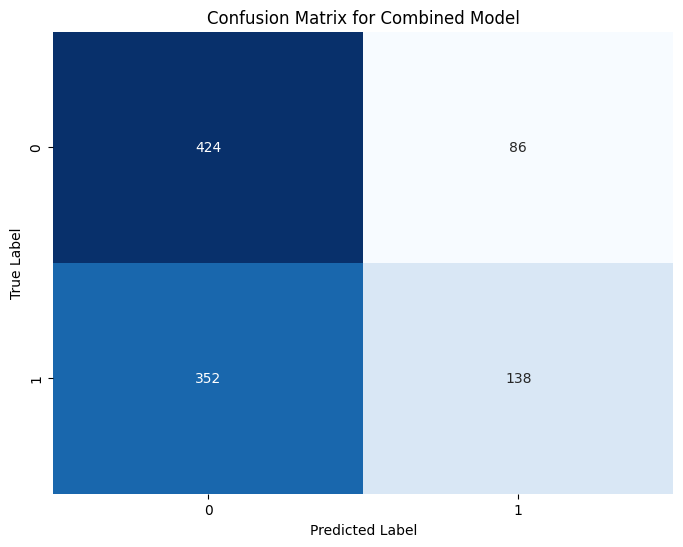

In [112]:
true_labels_combined = [true_labels.get(image_id) for image_id, label in combined_predictions]
predicted_labels_combined = [1 if label == 'Hateful' else 0 for image_id, label in combined_predictions]

plot_confusion_matrix(true_labels_combined, predicted_labels_combined, 'Combined Model')

In [113]:

true_labels_combined = [true_labels.get(image_id) for image_id, label in combined_predictions]
predicted_labels_combined = [1 if label == 'Hateful' else 0 for image_id, label in combined_predictions]


combined_true_hateful, combined_true_non_hateful, combined_false_hateful, combined_false_non_hateful = calculate_confusion_matrix_values(true_labels_combined, predicted_labels_combined)

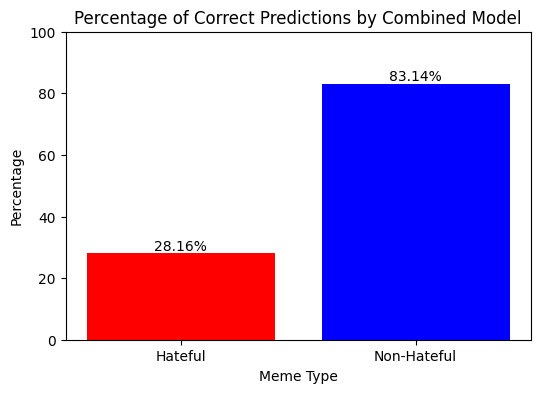

In [129]:
plot_correct_percentage(combined_predictions, true_labels, 'Combined Model')

In [134]:
# Initialize a counter for correct predictions made by the combined model
correct_combined_predictions = 0

# Iterate through each combined prediction and compare with the true label
for image_id, prediction in combined_predictions:
    true_label = true_labels.get(image_id)
    if true_label is not None:
        # Rule 1: Both models predict 'Hateful'
        if prediction == 'Hateful' and true_label == 1:
            correct_combined_predictions += 1
        # Rule 2: Both models predict 'Non-Hateful'
        elif prediction == 'Non-Hateful' and true_label == 0:
            correct_combined_predictions += 1
       
# Calculate the accuracy of the combined model
combined_accuracy = (correct_combined_predictions / len(combined_predictions)) * 100

# Print the accuracy of the combined model
print(f"Combined Model Accuracy: {combined_accuracy:.2f}")

# Calculate precision, recall, and F1 score for the combined model
combined_precision = combined_true_hateful / (combined_true_hateful + combined_false_hateful)
combined_recall = combined_true_hateful / (combined_true_hateful + combined_false_non_hateful)
combined_f1 = 2 * (combined_precision * combined_recall) / (combined_precision + combined_recall)

# Print precision, recall, and F1 score for the combined model
print("Combined Model Metrics:")
print(f"Precision: {combined_precision:.2f}")
print(f"Recall: {combined_recall:.2f}")
print(f"F1 Score: {combined_f1:.2f}")

Combined Model Accuracy: 56.20
Combined Model Metrics:
Precision: 0.62
Recall: 0.28
F1 Score: 0.39


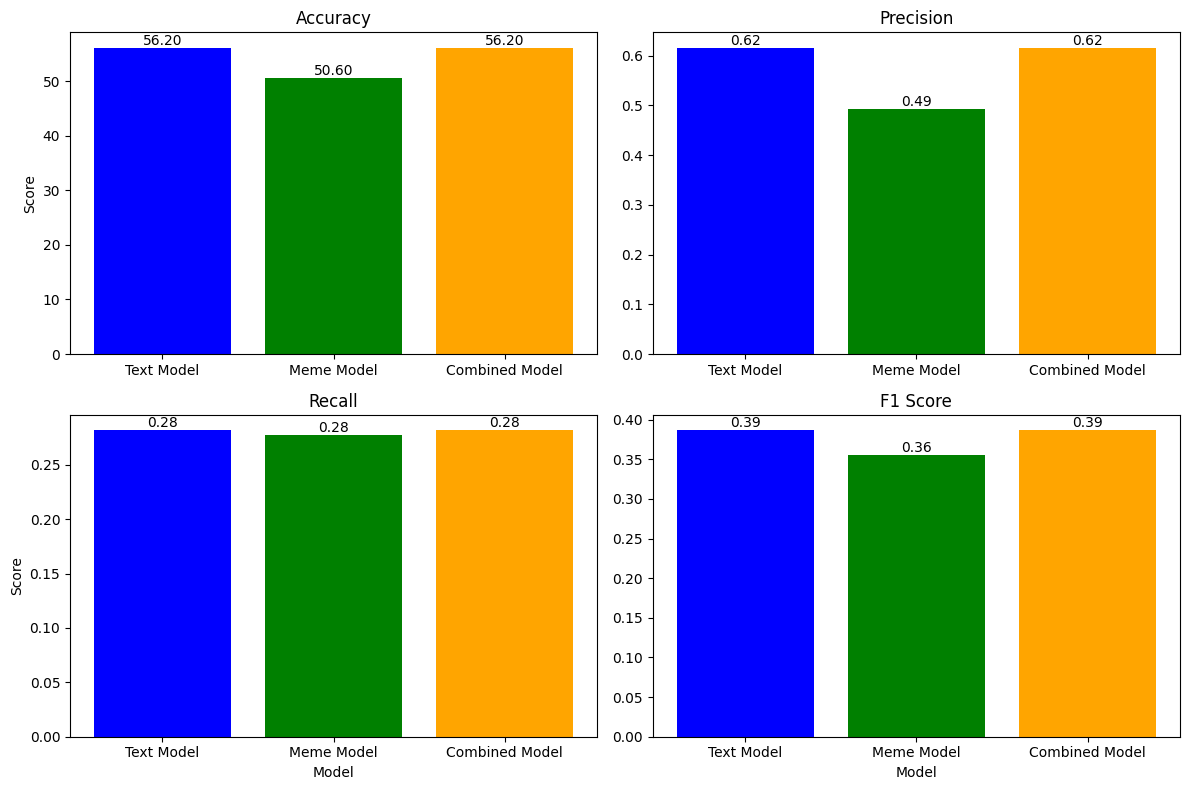

In [135]:
import matplotlib.pyplot as plt

# Define model names
models = ['Text Model', 'Meme Model', 'Combined Model']

# Define metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Define values for each metric for each model
accuracy_values = [text_accuracy, meme_accuracy, combined_accuracy]
precision_values = [text_precision, meme_precision, combined_precision]
recall_values = [text_recall, meme_recall, combined_recall]
f1_values = [text_f1, meme_f1, combined_f1]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot accuracy
bars = axs[0, 0].bar(models, accuracy_values, color=['blue', 'green', 'orange'])
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_ylabel('Score')

# Add text annotations for accuracy values
for bar, acc in zip(bars, accuracy_values):
    axs[0, 0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{acc:.2f}', 
                   ha='center', va='bottom')

# Plot precision
bars = axs[0, 1].bar(models, precision_values, color=['blue', 'green', 'orange'])
axs[0, 1].set_title('Precision')

# Add text annotations for precision values
for bar, prec in zip(bars, precision_values):
    axs[0, 1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{prec:.2f}', 
                   ha='center', va='bottom')

# Plot recall
bars = axs[1, 0].bar(models, recall_values, color=['blue', 'green', 'orange'])
axs[1, 0].set_title('Recall')
axs[1, 0].set_ylabel('Score')
axs[1, 0].set_xlabel('Model')

# Add text annotations for recall values
for bar, rec in zip(bars, recall_values):
    axs[1, 0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{rec:.2f}', 
                   ha='center', va='bottom')

# Plot F1 score
bars = axs[1, 1].bar(models, f1_values, color=['blue', 'green', 'orange'])
axs[1, 1].set_title('F1 Score')
axs[1, 1].set_xlabel('Model')

# Add text annotations for F1 score values
for bar, f1 in zip(bars, f1_values):
    axs[1, 1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{f1:.2f}', 
                   ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [128]:
# Save IDs of hateful and non-hateful memes predicted by each model into separate text files
meme_hateful_ids = [image_id for image_id, label in meme_predictions if label == 'Hateful']
meme_non_hateful_ids = [image_id for image_id, label in meme_predictions if label == 'Non-Hateful']
text_hateful_ids = [image_id for image_id, label in text_predictions if label == 'Hateful']
text_non_hateful_ids = [image_id for image_id, label in text_predictions if label == 'Non-Hateful']
combined_hateful_ids= [image_id for image_id, label in combined_predictions if label == 'Hateful']
combined_non_hateful_ids= [image_id for image_id, label in combined_predictions if label == 'Non-Hateful']

save_image_ids(meme_hateful_ids, 'meme_hateful_ids.txt')
save_image_ids(meme_non_hateful_ids, 'meme_non_hateful_ids.txt')
save_image_ids(text_hateful_ids, 'text_hateful_ids.txt')
save_image_ids(text_non_hateful_ids, 'text_non_hateful_ids.txt')
save_image_ids(combined_hateful_ids,'combined_hateful_ids.txt')
save_image_ids(combined_non_hateful_ids,'combined_non_hateful_ids.txt')

In [116]:

# Initialize lists to store image IDs for each scenario
both_hateful = []
both_non_hateful = []
text_hateful_meme_non_hateful = []
text_non_hateful_meme_hateful = []

In [121]:

# Compare predictions and categorize cases, storing image IDs accordingly
for meme_pred, text_pred in zip(meme_predictions, text_predictions):
    image_id_meme, label_meme = meme_pred
    image_id_text, label_text = text_pred
    if label_meme == 'Hateful' and label_text == 'Hateful':
        both_hateful.append(image_id_meme)
    elif label_meme == 'Non-Hateful' and label_text == 'Non-Hateful':
        both_non_hateful.append(image_id_meme)
    elif label_meme == 'Hateful' and label_text == 'Non-Hateful':
        text_hateful_meme_non_hateful.append(image_id_meme)
    elif label_meme == 'Non-Hateful' and label_text == 'Hateful':
        text_non_hateful_meme_hateful.append(image_id_meme)

# Save image IDs into separate text files
save_image_ids(both_hateful, 'both_hateful.txt')
save_image_ids(both_non_hateful, 'both_non_hateful.txt')
save_image_ids(text_hateful_meme_non_hateful, 'text_hateful_meme_non_hateful.txt')
save_image_ids(text_non_hateful_meme_hateful, 'text_non_hateful_meme_hateful.txt')



['96185', '57932', '03976', '02584', '63502', '05219', '94380', '04879', '76091', '08524', '31468', '80392', '96502', '65734', '62790', '09357', '23751', '42739', '75136', '41692', '48123', '95306', '75039', '04583', '98340', '08294', '92683', '57389', '84316', '40268', '40723', '12589', '74259', '42083', '82547', '61497', '69304', '92658', '60794', '86514', '01364', '82964', '81752', '90875', '65740', '31057', '42169', '48652', '16348', '84395', '07265', '08917', '68034', '15942', '16253', '54617', '89307', '57049', '25193', '65473', '02649', '92547', '31470', '58467', '17539', '54098', '92601', '86529', '62085', '20974', '93820', '96185', '57932', '03976', '02584', '63502', '05219', '94380', '04879', '76091', '08524', '31468', '80392', '96502', '65734', '62790', '09357', '23751', '42739', '75136', '41692', '48123', '95306', '75039', '04583', '98340', '08294', '92683', '57389', '84316', '40268', '40723', '12589', '74259', '42083', '82547', '61497', '69304', '92658', '60794', '86514', 

In [125]:
# Initialize lists to store image IDs for correct predictions of each model
meme_correct_hateful = []
meme_correct_non_hateful = []
text_correct_hateful = []
text_correct_non_hateful = []
combined_correct_hateful = []
combined_correct_non_hateful = []


In [126]:
# Compare predictions with true labels and categorize cases, storing image IDs accordingly
for meme_pred, text_pred,combined_pred in zip(meme_predictions, text_predictions,combined_predictions):
    image_id_meme, label_meme = meme_pred
    image_id_text, label_text = text_pred
    image_id_combined, label_combined = combined_pred
    
    true_label = true_labels.get(image_id_meme)
    if true_label is not None:
        if true_label == 1:  # Hateful
            if label_meme == 'Hateful':
                meme_correct_hateful.append(image_id_meme)
            if label_text == 'Hateful':
                text_correct_hateful.append(image_id_meme)
            if label_combined == 'Hateful':
                combined_correct_hateful.append(image_id_meme)
        elif true_label == 0:  # Non-Hateful
            if label_meme == 'Non-Hateful':
                meme_correct_non_hateful.append(image_id_meme)
            if label_text == 'Non-Hateful':
                text_correct_non_hateful.append(image_id_meme)
            if label_combined == 'Non-Hateful':
                combined_correct_non_hateful.append(image_id_meme)


In [127]:
# Save image IDs of memes correctly matched with true labels for each model
save_image_ids(meme_correct_hateful, 'meme_correct_hateful.txt')
save_image_ids(meme_correct_non_hateful, 'meme_correct_non_hateful.txt')
save_image_ids(text_correct_hateful, 'text_correct_hateful.txt')
save_image_ids(text_correct_non_hateful, 'text_correct_non_hateful.txt')
save_image_ids(combined_correct_hateful, 'combined_correct_hateful.txt')
save_image_ids(combined_correct_non_hateful, 'combined_correct_non_hateful.txt')